In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# libraries required
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('weather.csv')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [5]:
data.shape

(145460, 24)

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@dropdown
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,0.0
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
data.shape

(145460, 24)

In [9]:
data.isnull().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3267
@dropdown        145460
dtype: int64

<Axes: >

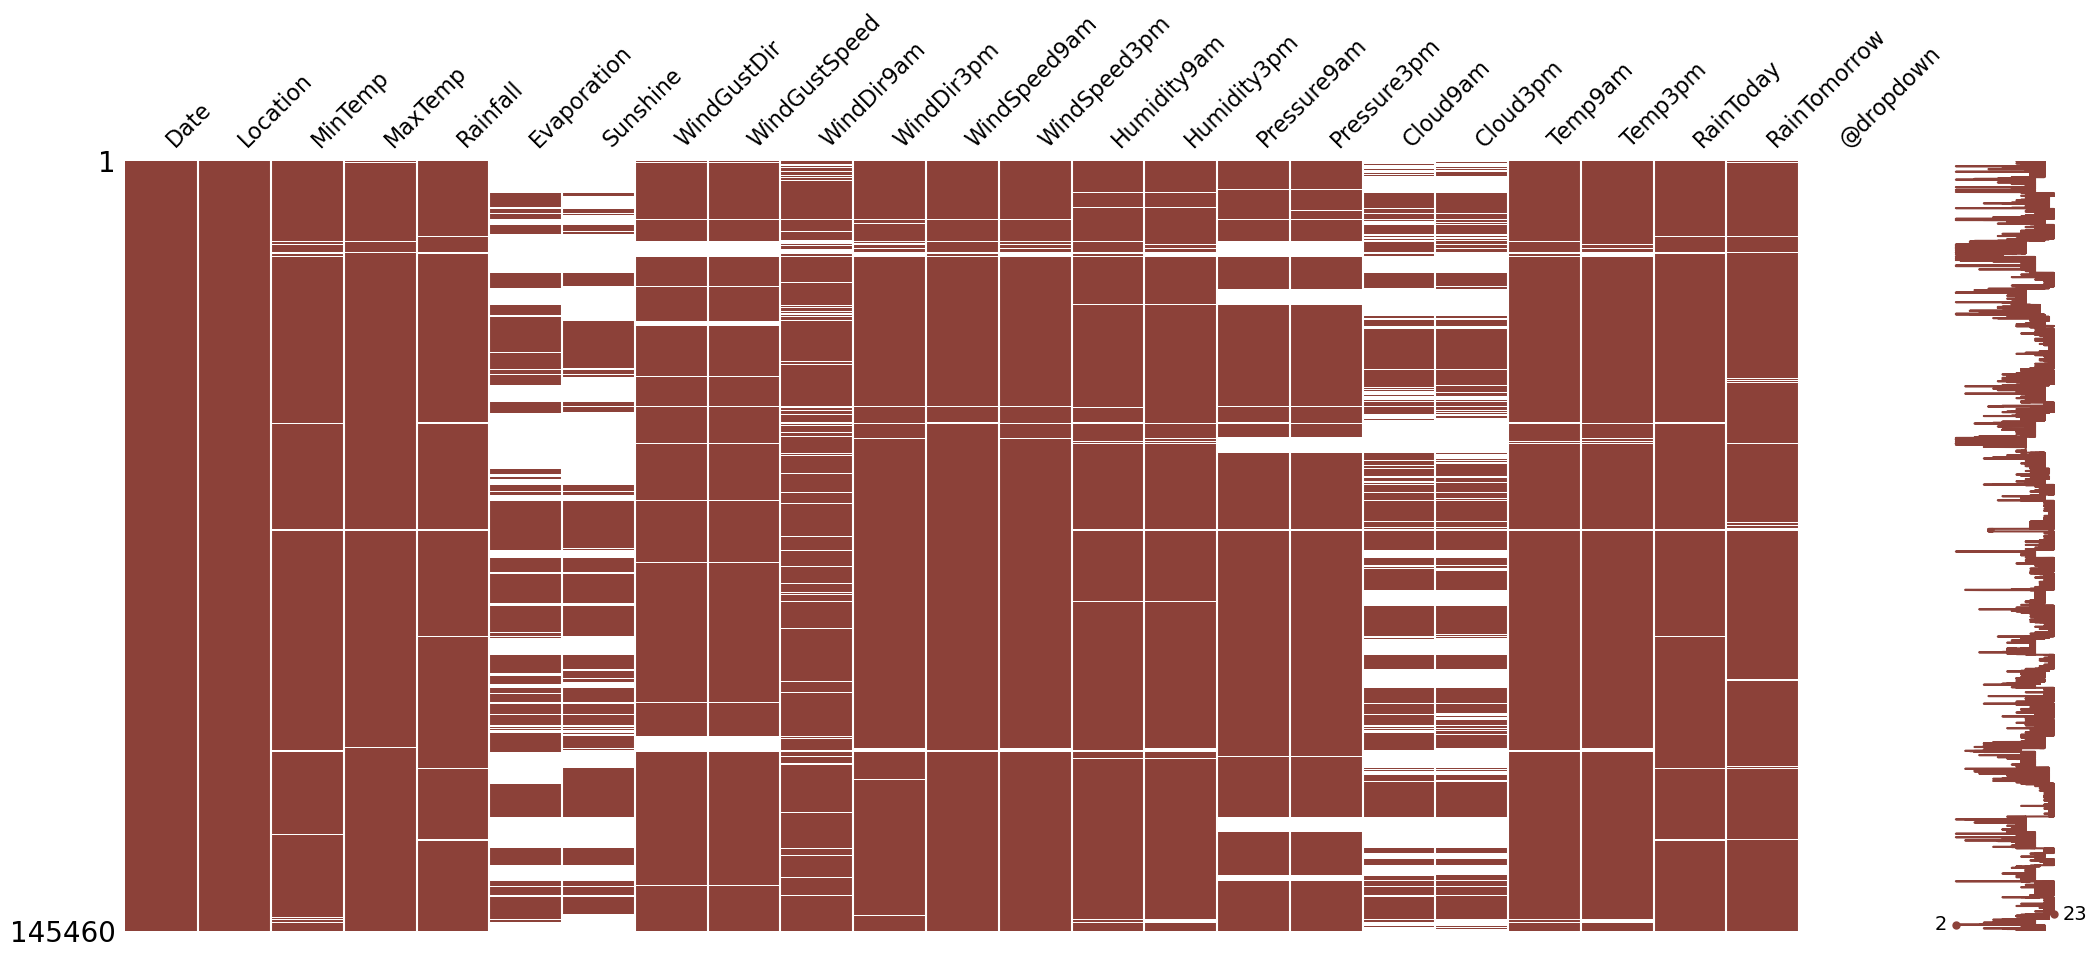

In [10]:
import missingno as msno
msno.matrix(data,color=(0.55,0.255,0.225), fontsize=16)

In [11]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [12]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [13]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,NaN


In [14]:
data.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,@dropdown
145455,2017-06-21,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,NaN
145456,2017-06-22,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,NaN
145457,2017-06-23,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,NaN
145458,2017-06-24,Uluru,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,NaN
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,NaN,NaN


In [15]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
WindGustSpeed     True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Temp9am           True
Temp3pm           True
RainTomorrow      True
@dropdown         True
dtype: bool

In [16]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [17]:
data.isnull().sum()

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Temp9am               0
Temp3pm               0
RainTomorrow       3267
@dropdown        145460
dtype: int64

In [18]:
data.shape

(145460, 16)

In [19]:
data.drop("@dropdown", axis=1, inplace=True)

In [20]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
data = data.fillna(method='ffill').fillna(method='bfill')

C:\Users\jrbil\AppData\Local\Temp\ipykernel_16468\2207047380.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


In [22]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
data['RainTomorrow']=data['RainTomorrow'].map({'Yes':1,'No':0}).astype(int)

In [24]:
data['RainTomorrow'].unique()

array([0, 1])

In [25]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [26]:
data['RainTomorrow'].unique()

array([0, 1])

In [27]:
# loading the names of categorical columns
cat_names = data_cat.columns

In [28]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [29]:
# fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [30]:
# converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [31]:
# concatinating the categorical and numeric data
data = pd.concat([data,data_cat],axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
     data[col]= le.fit_transform(data[col])
# data['Date'] = le.fit_transform(data['Date'])
# data['Location'] = le.fit_transform(data['Location'])
# data['RainToday'] = le.fit_transform(data['RainToday'])
# data['RainTomorrow'] = data['RainTomorrow'].astype(str)
# data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])
# data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
# data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
# data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])

In [33]:
data.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
Date,1.000000,0.020198,0.020929,0.043892,-0.012112,-0.022976,-0.012682,-0.022834,0.000045,-0.010951,0.031792,0.025755,0.031165,0.031318,-0.012648,-0.012801,-0.019588,0.002318,0.002245
Location,0.020198,1.000000,-0.008537,-0.022893,-0.003214,0.070514,0.078029,0.064266,0.000225,0.013321,0.035801,0.045928,-0.018206,-0.025735,0.000720,-0.005573,-0.003074,-0.002808,0.009451
MinTemp,0.020929,-0.008537,1.000000,0.733400,0.102706,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.897692,0.699211,0.080791,0.054559,-0.136443,-0.031327,-0.159783
MaxTemp,0.043892,-0.022893,0.733400,1.000000,-0.074040,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,0.879170,0.968713,-0.161223,-0.225439,-0.211930,-0.212968,-0.182044
Rainfall,-0.012112,-0.003214,0.102706,-0.074040,1.000000,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.011069,-0.077684,0.239072,0.499899,0.044620,0.084716,0.048193
WindGustSpeed,-0.022976,0.070514,0.172553,0.065895,0.126446,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.145904,0.031884,0.221127,0.145700,0.136200,0.073234,0.135583
WindSpeed9am,-0.012682,0.078029,0.173404,0.014294,0.085925,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.127592,0.004476,0.089634,0.098636,0.008386,0.108959,0.050192
WindSpeed3pm,-0.022834,0.064266,0.173058,0.049717,0.056527,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.161060,0.027587,0.085139,0.077076,0.084011,0.111575,0.090691
Humidity9am,0.000045,0.000225,-0.230970,-0.497927,0.221380,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,-0.469641,-0.490709,0.255971,0.347034,0.068775,0.088769,0.026167
Humidity3pm,-0.010951,0.013321,0.005995,-0.498760,0.248905,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,-0.216964,-0.555608,0.437028,0.367937,0.065027,0.148476,-0.006052


In [34]:
cor=data.corr()

<Axes: >

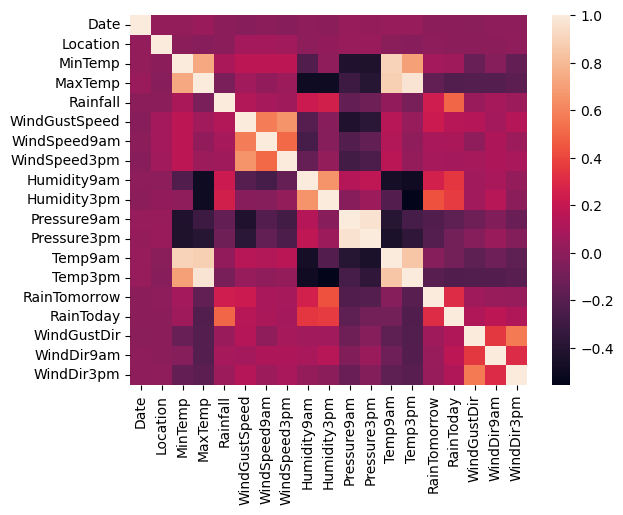

In [35]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

In [36]:
#sns.pairplot(data)

C:\Users\jrbil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jrbil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


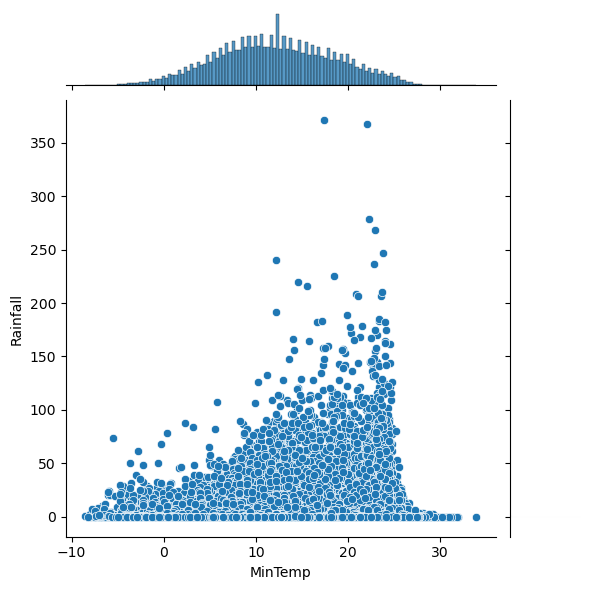

In [37]:
import seaborn as sns

sns.jointplot(x='MinTemp', y='Rainfall', data=data)

C:\Users\jrbil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RainTomorrow', ylabel='Count'>

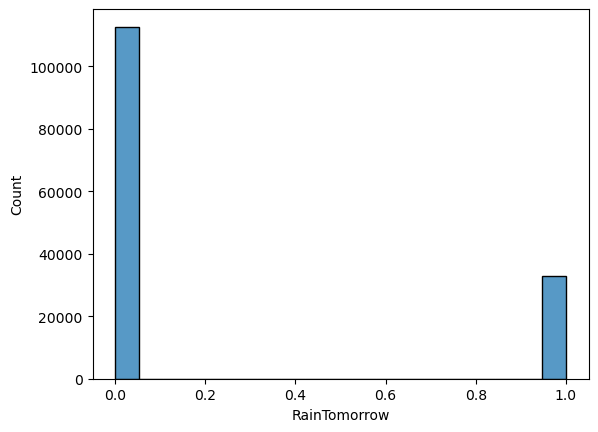

In [38]:
sns.histplot(data['RainTomorrow'])

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

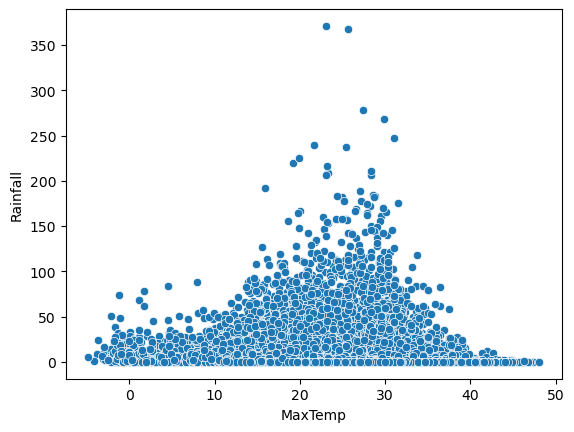

In [39]:
import seaborn as sns

sns.scatterplot(x=data['MaxTemp'], y=data['Rainfall'])

C:\Users\jrbil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


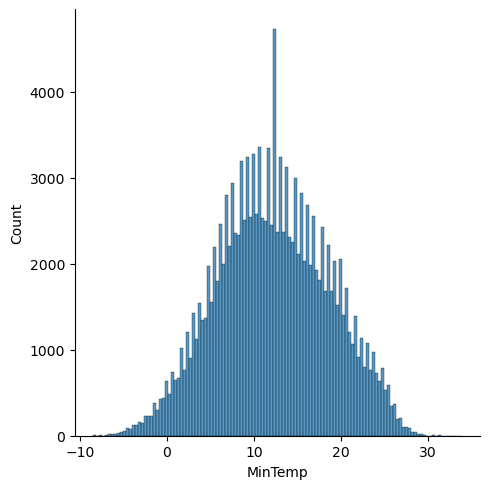

In [40]:
sns.displot(data['MinTemp'])

In [41]:
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [42]:
#splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,396,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,397,14,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,398,14,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,399,14,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,400,14,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [45]:
x.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
145455,3431,42,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,9,1
145456,3432,42,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,6,9,3
145457,3433,42,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,3,9,14
145458,3434,42,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,9,10,3
145459,3435,42,14.9,23.221348,0.0,40.03523,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,0,13,2,2


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

In [47]:
names = x.columns

In [48]:
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [49]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [50]:
x = pd.DataFrame(x,columns=names)

print(x)

            Date  Location   MinTemp       MaxTemp  Rainfall  WindGustSpeed  \
0      -1.731640 -0.719411  0.189447 -4.533631e-02 -0.210072       0.302234   
1      -1.730510 -0.719411 -0.753101  2.650431e-01 -0.281650       0.302234   
2      -1.729380 -0.719411  0.110901  3.496920e-01 -0.281650       0.454694   
3      -1.728250 -0.719411 -0.470337  6.741796e-01 -0.281650      -1.222364   
4      -1.727120 -0.719411  0.833521  1.280830e+00 -0.162353       0.073544   
...          ...       ...       ...           ...       ...            ...   
145455  1.697797  1.199540 -1.475720  2.520446e-02 -0.281650      -0.688755   
145456  1.698927  1.199540 -1.350047  2.932594e-01 -0.281650      -1.374824   
145457  1.700057  1.199540 -1.067283  5.189899e-01 -0.281650      -0.231375   
145458  1.701187  1.199540 -0.690264  5.330980e-01 -0.281650      -0.917445   
145459  1.702317  1.199540  0.425083 -5.012223e-16 -0.281650       0.000000   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Hu

In [51]:
from sklearn import model_selection

In [52]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
#model intilization of the models
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
#SVM = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [54]:
#fitting the model
XGBoost.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [55]:
Rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
#SVM.fit(x_train,y_train)

In [57]:
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
print(x_train)

            Date  Location   MinTemp   MaxTemp  Rainfall  WindGustSpeed  \
22926   0.345231  0.240065  1.037739  0.067529 -0.257790       0.912074   
80735   1.406266  1.405142 -0.454627  0.109853 -0.257790       0.607154   
121764 -0.632186  0.514201 -0.203281 -0.144093 -0.114634      -1.069905   
139821 -1.102251 -0.787945  1.116285  0.942234 -0.281650       0.226004   
1867    0.378000 -1.541819  0.550756 -0.793068  1.197630      -1.527284   
...          ...       ...       ...       ...       ...            ...   
41993   1.077447  1.473676  0.880648  2.099103 -0.281650      -0.078916   
97639  -0.414104 -1.678887  0.048065  0.575422 -0.281650      -0.764985   
95939   1.272931  1.062472  0.754975  0.928126 -0.281650      -1.374824   
117952 -1.331633  0.582734 -0.046190 -0.172310  0.171678      -0.383835   
43567  -0.579078  1.610744 -0.030481 -0.920042 -0.186212       0.759614   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
22926       1.913612  

In [59]:
print(x_train.shape)

(116368, 18)


In [60]:
GBM.fit(x_train,y_train)

GradientBoostingClassifier()

In [61]:
log.fit(x_train,y_train)

LogisticRegression()

In [62]:

# predicting the train values
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
Rand_forest.fit(x_train,y_train)
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
#p3 = SVM.predict(x_train)  # Use SVM (uppercase), the SVC object
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [63]:
x_train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [64]:
# checking the accuracy score
print("Xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
#print("SVM:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

Xgboost: 0.8421731060085247
Rand_forest: 0.9999828131445071
Dtree: 1.0
GBM: 0.8469510518355562
log: 0.8369483019386773


In [65]:
# Assuming you have your fitted models (XGBoost, Rand_forest, etc.) and x_test available

# Generate predictions on the test set
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
#t3 = SVM.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

# Now you can print the accuracy scores
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
#print("SVM:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM:",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.840196617626839
Rand_forest: 0.8521586690499107
Dtree: 0.7796988862917641
GBM: 0.8450433108758422
log: 0.8379623264127595


In [66]:
# Assuming 'SVM' is your chosen model and you want its predictions
y_pred = Dtree.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[19243  3314]
 [ 3095  3440]]


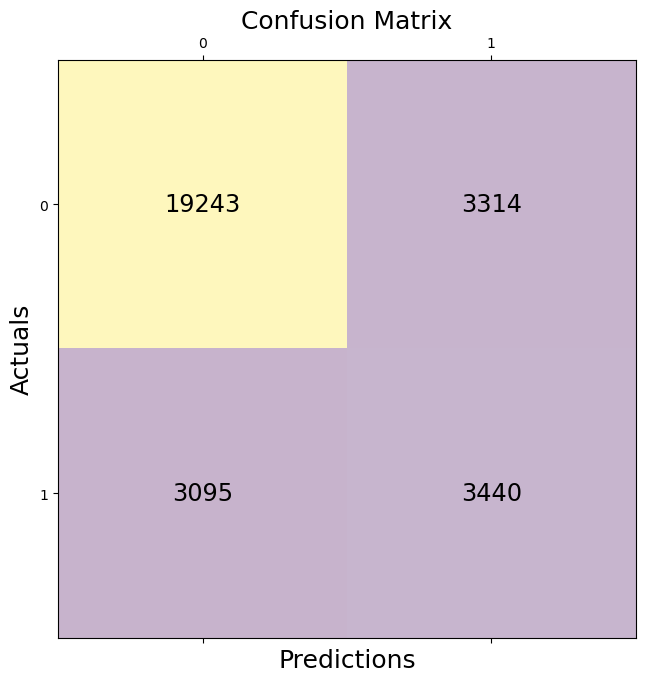

In [67]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [68]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(conf_matrix)
print("Accuracy:",accuracy_score(y_test, y_pred)) # Calculate accuracy
print("Recall:",recall_score(y_test, y_pred, average='macro')) # Calculate recall (macro average for multiclass)
print("Precision:",precision_score(y_test, y_pred, average='macro')) # Calculate precision (macro average)
print("F1-score:",f1_score(y_test, y_pred, average='macro')) # Calculate F1-score (macro average)

[[19243  3314]
 [ 3095  3440]]
Accuracy: 0.7796988862917641
Recall: 0.6897398137758569
Precision: 0.6853873337972534
F1-score: 0.6874830528848884


In [69]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:", mse)

#R-squared
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared:",r_squared)

#Mean absolute error
mae = np.mean(np.abs(y_test - y_pred))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:",mae)

#Root Mean Squared Error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

#Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Mean Absolute Percentage Error: {mape}%")

Mean Squared Error: 0.22030111370823593
R-squared: -0.26484386625208134
Mean Absolute Error: 0.22030111370823593
Root Mean Squared Error: 0.46936245451488334
Mean Absolute Percentage Error: 5.130252016054525e+16%


In [70]:
Dtree.predict([[396,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14]])

C:\Users\jrbil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [71]:
Dtree.predict([[397,14,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15]])

C:\Users\jrbil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Calculate ROC AUC score for each class and macro-average
auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 10), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC curve")
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
    plt.fill_between(fpr[i], tpr[i], alpha=0.2)
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [73]:
import pickle

In [75]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # Now you can use it

In [77]:
pickle.dump(Dtree,open("best_model.pkl","wb"))

In [79]:
pickle.dump(sc,open('scaler.pkl','wb'))

In [81]:
import os
os.getcwd()

'C:\\Users\\jrbil\\Desktop\\RainfallPrediction\\flask'

In [83]:
import sklearn
sklearn.__version__

'1.2.2'